# COVID19 Death / Happiness report Data Analysis



### 1. Importing the modules

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


### 2. Importing the covid19 death dataset

In [2]:
corona_dataset_csv = pd.read_csv("Datasets/covid19_deaths_dataset.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,147,152,165,176,185,192,197,207,214,218
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,24,24,24,27,28,28,29,30,30,32
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,0,0,...,26,26,31,33,33,34,34,39,40,41


In [3]:
# lets drop latitude and longitude columns 
corona_dataset_csv.drop(["Lat","Long"], axis=1, inplace=True)
corona_dataset_csv.head()

In [4]:
# check the shape of the dataframe
corona_dataset_csv.shape

(266, 102)

In [5]:
# lets aggregate the rows by country/region
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
corona_dataset_aggregated.shape

(187, 100)

In [11]:
corona_dataset_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   1/22/20  187 non-null    int64
 1   1/23/20  187 non-null    int64
 2   1/24/20  187 non-null    int64
 3   1/25/20  187 non-null    int64
 4   1/26/20  187 non-null    int64
 5   1/27/20  187 non-null    int64
 6   1/28/20  187 non-null    int64
 7   1/29/20  187 non-null    int64
 8   1/30/20  187 non-null    int64
 9   1/31/20  187 non-null    int64
 10  2/1/20   187 non-null    int64
 11  2/2/20   187 non-null    int64
 12  2/3/20   187 non-null    int64
 13  2/4/20   187 non-null    int64
 14  2/5/20   187 non-null    int64
 15  2/6/20   187 non-null    int64
 16  2/7/20   187 non-null    int64
 17  2/8/20   187 non-null    int64
 18  2/9/20   187 non-null    int64
 19  2/10/20  187 non-null    int64
 20  2/11/20  187 non-null    int64
 21  2/12/20  187 non-null    int64
 22  2/13/20  187 no

### 3. Visualizing data


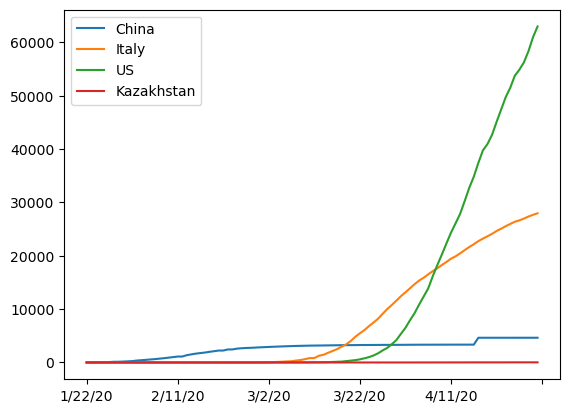

In [13]:
corona_dataset_aggregated.loc["China"].plot() #loc = locate panda series
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["US"].plot()
corona_dataset_aggregated.loc["Kazakhstan"].plot()
plt.legend()

<AxesSubplot:>

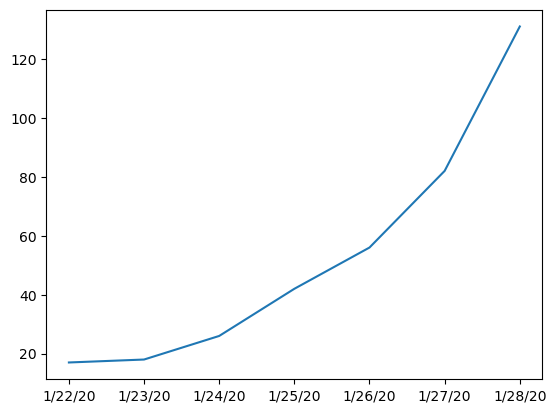

In [16]:
#show data for only 1 week
corona_dataset_aggregated.loc['China'][:7].plot()

<AxesSubplot:>

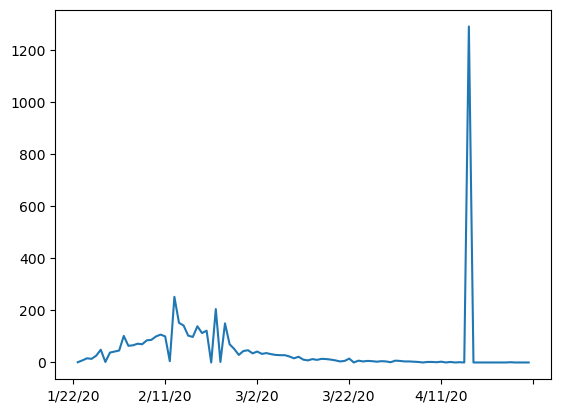

In [17]:
#find rate of the curve
corona_dataset_aggregated.loc["China"].diff().plot() 

In [19]:
#find maximum death rate for China
corona_dataset_aggregated.loc['China'].diff().max()

1290.0

In [20]:
#find maximum death rate for Italy
corona_dataset_aggregated.loc['Italy'].diff().max()

919.0

In [21]:
#find maximum death rate for US
corona_dataset_aggregated.loc['US'].diff().max()

2612.0

In [22]:
#find maximum death rate for Kazakhstan
corona_dataset_aggregated.loc['Kazakhstan'].diff().max()

5.0

In [24]:
countries = list(corona_dataset_aggregated.index)
max_death_rate = []
for c in countries :
    max_death_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_death_rate"] = max_death_rate

In [25]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_death_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [26]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_death_rate"])
corona_data.head(5)

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [28]:
happiness_report_df = pd.read_csv("Datasets/worldwide_happiness_report.csv")
happiness_report_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [41]:
remove_cols = ['Overall rank',"Generosity","Perceptions of corruption"]

In [43]:
happiness_report_df.drop(remove_cols,axis=1,inplace=True)
happiness_report_df.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,7.769,1.340,1.587,0.986,0.596
1,Denmark,7.600,1.383,1.573,0.996,0.592
2,Norway,7.554,1.488,1.582,1.028,0.603
3,Iceland,7.494,1.380,1.624,1.026,0.591
4,Netherlands,7.488,1.396,1.522,0.999,0.557


In [44]:
#changing the indices of the dataframe
happiness_report_df.set_index("Country or region",inplace=True)
happiness_report_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

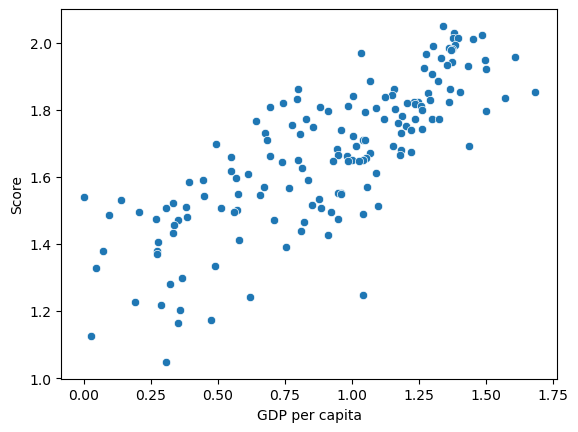

In [45]:
x = happiness_report_df["GDP per capita"]
y = happiness_report_df["Score"]
sns.scatterplot(x,np.log(y))

/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Score'>

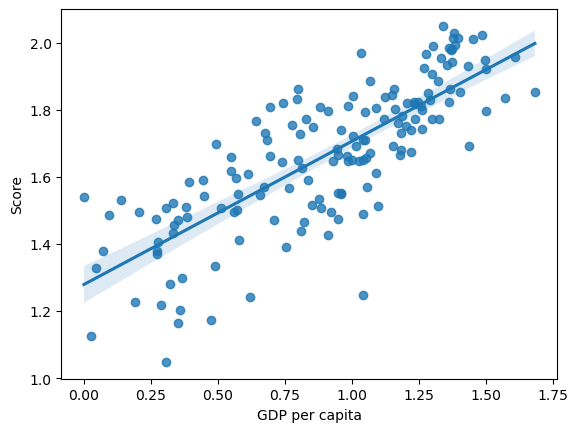

In [46]:
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Score'>

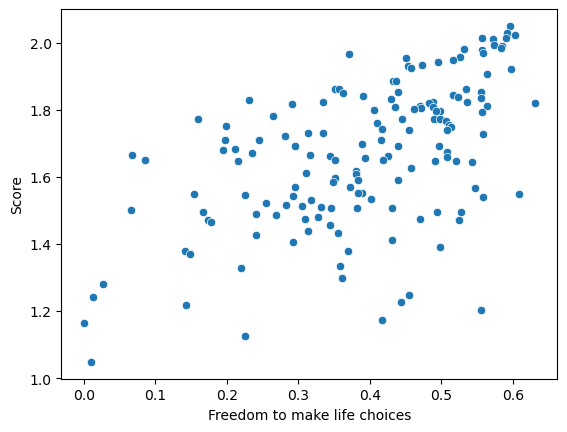

In [47]:
x = happiness_report_df["Freedom to make life choices"]
y = happiness_report_df["Score"]
sns.scatterplot(x,np.log(y))

/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Score'>

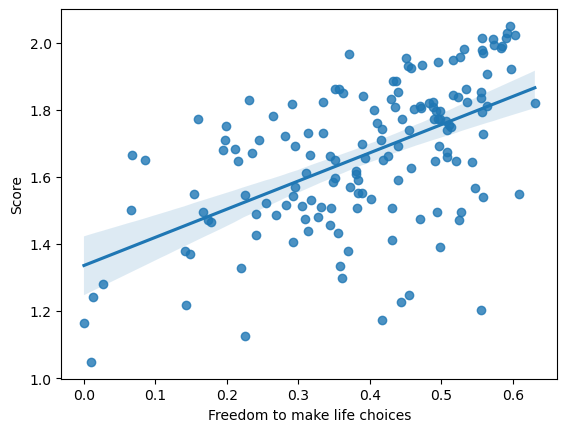

In [48]:
sns.regplot(x,np.log(y))

### Let's join two datasets

In [49]:
corona_data.head()

,max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [50]:
corona_data.shape

(187, 1)

In [51]:
happiness_report_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,0.596
Denmark,7.600,1.383,1.573,0.996,0.592
Norway,7.554,1.488,1.582,1.028,0.603
Iceland,7.494,1.380,1.624,1.026,0.591
Netherlands,7.488,1.396,1.522,0.999,0.557


In [52]:
happiness_report_df.shape

(156, 5)

In [53]:
joined_df = corona_data.join(happiness_report_df,how="inner")
joined_df.head()

,max_death_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,3.203,0.350,0.517,0.361,0.000
Albania,4.0,4.719,0.947,0.848,0.874,0.383
Algeria,30.0,5.211,1.002,1.160,0.785,0.086
Argentina,13.0,6.086,1.092,1.432,0.881,0.471
Armenia,3.0,4.559,0.850,1.055,0.815,0.283


In [54]:
joined_df.corr()

,max_death_rate,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_death_rate,1.000000,0.258307,0.259893,0.204148,0.309666,0.080166
Score,0.258307,1.000000,0.793847,0.788591,0.799893,0.587007
GDP per capita,0.259893,0.793847,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.788591,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.799893,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.587007,0.394603,0.456246,0.427892,1.000000


/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

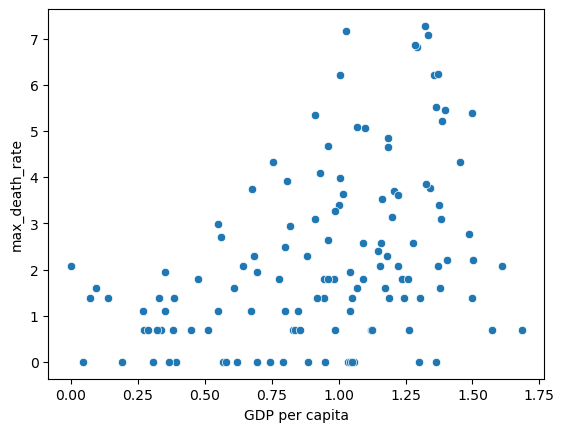

In [55]:
x = joined_df["GDP per capita"]
y = joined_df["max_death_rate"]
sns.scatterplot(x,np.log(y))

/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='GDP per capita', ylabel='max_death_rate'>

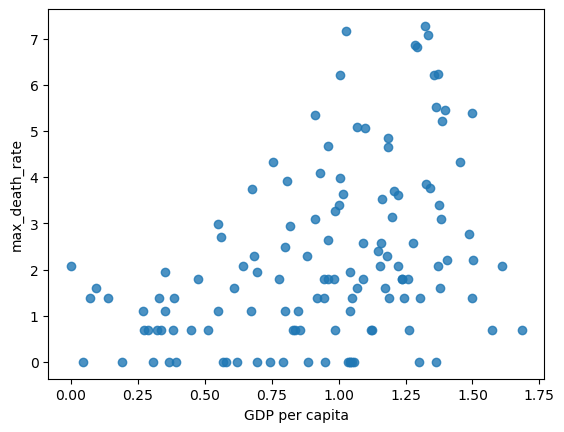

In [56]:
sns.regplot(x,np.log(y))

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_death_rate'>

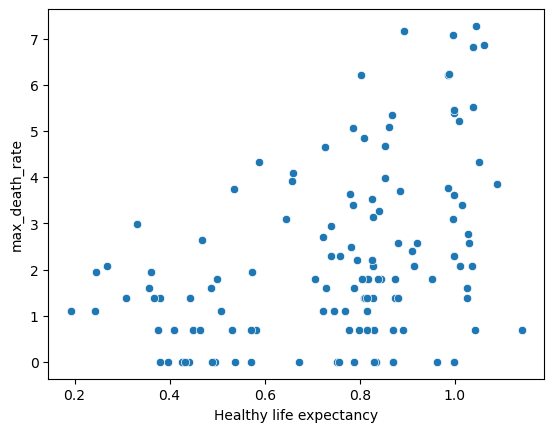

In [57]:
x = joined_df["Healthy life expectancy"]
y = joined_df["max_death_rate"]
sns.scatterplot(x,np.log(y))

/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/arna.togayeva/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_death_rate'>

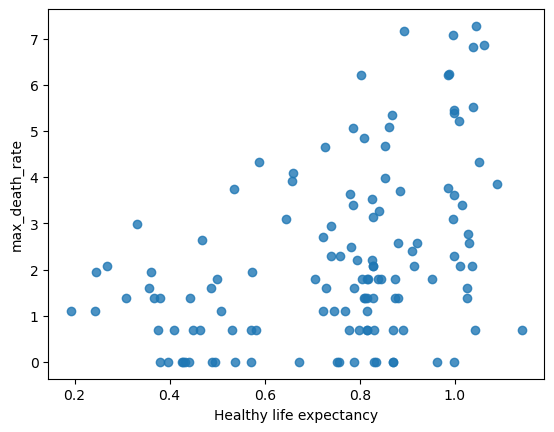

In [58]:
sns.regplot(x,np.log(y))